<h1>Import necessary libraries</h1>

In [168]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

<h1>load the dataset!</h1>

In [169]:
data = pd.read_csv(r'C:\Users\salma\OneDrive\Desktop\SALMAN\ds-projects\netflix_analysis\netflix.csv')
data

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0
...,...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0
5802,Edis Starlight,MOVIE,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN
5803,Clash,MOVIE,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0
5804,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0


In [170]:
data.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0


In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5805 non-null   object 
 1   type                  5806 non-null   object 
 2   release_year          5806 non-null   int64  
 3   age_certification     3196 non-null   object 
 4   runtime               5806 non-null   int64  
 5   genres                5806 non-null   object 
 6   production_countries  5806 non-null   object 
 7   seasons               2047 non-null   float64
 8   imdb_id               5362 non-null   object 
 9   imdb_score            5283 non-null   float64
 10  imdb_votes            5267 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 499.1+ KB


In [172]:
data.shape


(5806, 11)

<h1>Data Cleaning</h1>

<h2>drop duplicates</h2>

In [173]:
data.drop_duplicates()
data

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0
...,...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0
5802,Edis Starlight,MOVIE,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN
5803,Clash,MOVIE,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0
5804,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0


<h2>filling the missing values</h2>

In [174]:

data['seasons'].fillna(0, inplace=True)
data['production_countries'].fillna('others', inplace=True)
data['genres'].fillna('others', inplace=True)
data

C:\Users\salma\AppData\Local\Temp\ipykernel_1740\960166024.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['seasons'].fillna(0, inplace=True)
C:\Users\salma\AppData\Local\Temp\ipykernel_1740\960166024.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],0.0,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],0.0,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],0.0,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],0.0,tt0070047,8.1,391942.0
...,...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",['NG'],0.0,tt13857480,6.9,39.0
5802,Edis Starlight,MOVIE,2021,NaN,74,"['music', 'documentation']",[],0.0,NaN,NaN,NaN
5803,Clash,MOVIE,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",0.0,tt14620732,6.5,32.0
5804,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",[],0.0,tt10168094,6.2,9.0


In [175]:
data['age_certification'].fillna('Uk', inplace=True)
data

C:\Users\salma\AppData\Local\Temp\ipykernel_1740\236528137.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age_certification'].fillna('Uk', inplace=True)


,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],0.0,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],0.0,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],0.0,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],0.0,tt0070047,8.1,391942.0
...,...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,Uk,100,"['romance', 'drama']",['NG'],0.0,tt13857480,6.9,39.0
5802,Edis Starlight,MOVIE,2021,Uk,74,"['music', 'documentation']",[],0.0,NaN,NaN,NaN
5803,Clash,MOVIE,2021,Uk,88,"['family', 'drama']","['NG', 'CA']",0.0,tt14620732,6.5,32.0
5804,Shadow Parties,MOVIE,2021,Uk,116,"['action', 'thriller']",[],0.0,tt10168094,6.2,9.0


In [176]:
data.isnull().sum()

title                     1
type                      0
release_year              0
age_certification         0
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_id                 444
imdb_score              523
imdb_votes              539
dtype: int64

In [177]:
data['title'].fillna(0, inplace=True)
data['imdb_score'].fillna(0, inplace=True)
data['imdb_votes'].fillna(0, inplace=True)
data

C:\Users\salma\AppData\Local\Temp\ipykernel_1740\1719728818.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['title'].fillna(0, inplace=True)
C:\Users\salma\AppData\Local\Temp\ipykernel_1740\1719728818.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,0.0,0.0
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],0.0,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],0.0,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],0.0,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],0.0,tt0070047,8.1,391942.0
...,...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,Uk,100,"['romance', 'drama']",['NG'],0.0,tt13857480,6.9,39.0
5802,Edis Starlight,MOVIE,2021,Uk,74,"['music', 'documentation']",[],0.0,NaN,0.0,0.0
5803,Clash,MOVIE,2021,Uk,88,"['family', 'drama']","['NG', 'CA']",0.0,tt14620732,6.5,32.0
5804,Shadow Parties,MOVIE,2021,Uk,116,"['action', 'thriller']",[],0.0,tt10168094,6.2,9.0


In [178]:
data.isnull().sum()

title                     0
type                      0
release_year              0
age_certification         0
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_id                 444
imdb_score                0
imdb_votes                0
dtype: int64

In [179]:
data.drop('imdb_id', axis=1, inplace=True) 

In [180]:
data

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,0.0,0.0
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],0.0,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],0.0,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],0.0,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],0.0,8.1,391942.0
...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,Uk,100,"['romance', 'drama']",['NG'],0.0,6.9,39.0
5802,Edis Starlight,MOVIE,2021,Uk,74,"['music', 'documentation']",[],0.0,0.0,0.0
5803,Clash,MOVIE,2021,Uk,88,"['family', 'drama']","['NG', 'CA']",0.0,6.5,32.0
5804,Shadow Parties,MOVIE,2021,Uk,116,"['action', 'thriller']",[],0.0,6.2,9.0


In [181]:
data['seasons'].replace(0, 1, inplace=True)
data

C:\Users\salma\AppData\Local\Temp\ipykernel_1740\931344194.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['seasons'].replace(0, 1, inplace=True)


,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,0.0,0.0
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],1.0,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],1.0,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],1.0,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],1.0,8.1,391942.0
...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,Uk,100,"['romance', 'drama']",['NG'],1.0,6.9,39.0
5802,Edis Starlight,MOVIE,2021,Uk,74,"['music', 'documentation']",[],1.0,0.0,0.0
5803,Clash,MOVIE,2021,Uk,88,"['family', 'drama']","['NG', 'CA']",1.0,6.5,32.0
5804,Shadow Parties,MOVIE,2021,Uk,116,"['action', 'thriller']",[],1.0,6.2,9.0


In [182]:
data['imdb_score'].replace(0, 1, inplace=True)
data

C:\Users\salma\AppData\Local\Temp\ipykernel_1740\4168370645.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['imdb_score'].replace(0, 1, inplace=True)


,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,1.0,0.0
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],1.0,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],1.0,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],1.0,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],1.0,8.1,391942.0
...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,Uk,100,"['romance', 'drama']",['NG'],1.0,6.9,39.0
5802,Edis Starlight,MOVIE,2021,Uk,74,"['music', 'documentation']",[],1.0,1.0,0.0
5803,Clash,MOVIE,2021,Uk,88,"['family', 'drama']","['NG', 'CA']",1.0,6.5,32.0
5804,Shadow Parties,MOVIE,2021,Uk,116,"['action', 'thriller']",[],1.0,6.2,9.0


In [183]:
mean_imdb_votes = data[data['imdb_votes'] != 0]['imdb_votes'].mean()
data['imdb_votes'].replace(0, mean_imdb_votes, inplace=True)
data

C:\Users\salma\AppData\Local\Temp\ipykernel_1740\2253913717.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['imdb_votes'].replace(0, mean_imdb_votes, inplace=True)


,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,1.0,23407.194988
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],1.0,8.3,795222.000000
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],1.0,8.2,530877.000000
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],1.0,8.0,392419.000000
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],1.0,8.1,391942.000000
...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,Uk,100,"['romance', 'drama']",['NG'],1.0,6.9,39.000000
5802,Edis Starlight,MOVIE,2021,Uk,74,"['music', 'documentation']",[],1.0,1.0,23407.194988
5803,Clash,MOVIE,2021,Uk,88,"['family', 'drama']","['NG', 'CA']",1.0,6.5,32.000000
5804,Shadow Parties,MOVIE,2021,Uk,116,"['action', 'thriller']",[],1.0,6.2,9.000000


In [184]:
data.isnull().sum() 

title                   0
type                    0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_score              0
imdb_votes              0
dtype: int64

In [185]:
data['genres'] = data['genres'].apply(lambda x: ', '.join(ast.literal_eval(x)))
data

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,documentation,['US'],1.0,1.0,23407.194988
1,Taxi Driver,MOVIE,1976,R,113,"crime, drama",['US'],1.0,8.3,795222.000000
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"comedy, fantasy",['GB'],1.0,8.2,530877.000000
3,Life of Brian,MOVIE,1979,R,94,comedy,['GB'],1.0,8.0,392419.000000
4,The Exorcist,MOVIE,1973,R,133,horror,['US'],1.0,8.1,391942.000000
...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,Uk,100,"romance, drama",['NG'],1.0,6.9,39.000000
5802,Edis Starlight,MOVIE,2021,Uk,74,"music, documentation",[],1.0,1.0,23407.194988
5803,Clash,MOVIE,2021,Uk,88,"family, drama","['NG', 'CA']",1.0,6.5,32.000000
5804,Shadow Parties,MOVIE,2021,Uk,116,"action, thriller",[],1.0,6.2,9.000000


In [186]:
data['production_countries'] = data['production_countries'].apply(lambda x: ', '.join(ast.literal_eval(x)) if isinstance(x, str) else x)
data

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,documentation,US,1.0,1.0,23407.194988
1,Taxi Driver,MOVIE,1976,R,113,"crime, drama",US,1.0,8.3,795222.000000
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"comedy, fantasy",GB,1.0,8.2,530877.000000
3,Life of Brian,MOVIE,1979,R,94,comedy,GB,1.0,8.0,392419.000000
4,The Exorcist,MOVIE,1973,R,133,horror,US,1.0,8.1,391942.000000
...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,Uk,100,"romance, drama",NG,1.0,6.9,39.000000
5802,Edis Starlight,MOVIE,2021,Uk,74,"music, documentation",,1.0,1.0,23407.194988
5803,Clash,MOVIE,2021,Uk,88,"family, drama","NG, CA",1.0,6.5,32.000000
5804,Shadow Parties,MOVIE,2021,Uk,116,"action, thriller",,1.0,6.2,9.000000


In [187]:
data['runtime'].replace(0, 44, inplace=True)
data

C:\Users\salma\AppData\Local\Temp\ipykernel_1740\1318021298.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['runtime'].replace(0, 44, inplace=True)


,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,documentation,US,1.0,1.0,23407.194988
1,Taxi Driver,MOVIE,1976,R,113,"crime, drama",US,1.0,8.3,795222.000000
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"comedy, fantasy",GB,1.0,8.2,530877.000000
3,Life of Brian,MOVIE,1979,R,94,comedy,GB,1.0,8.0,392419.000000
4,The Exorcist,MOVIE,1973,R,133,horror,US,1.0,8.1,391942.000000
...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,Uk,100,"romance, drama",NG,1.0,6.9,39.000000
5802,Edis Starlight,MOVIE,2021,Uk,74,"music, documentation",,1.0,1.0,23407.194988
5803,Clash,MOVIE,2021,Uk,88,"family, drama","NG, CA",1.0,6.5,32.000000
5804,Shadow Parties,MOVIE,2021,Uk,116,"action, thriller",,1.0,6.2,9.000000


<h2>Convert Data Types</h2>

In [188]:
data['seasons'] = data['seasons'].astype('Int64') 
data['imdb_votes'] = data['imdb_votes'].astype('int') 
data['imdb_score'] = data['imdb_score'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   title                 5806 non-null   object
 1   type                  5806 non-null   object
 2   release_year          5806 non-null   int64 
 3   age_certification     5806 non-null   object
 4   runtime               5806 non-null   int64 
 5   genres                5806 non-null   object
 6   production_countries  5806 non-null   object
 7   seasons               5806 non-null   Int64 
 8   imdb_score            5806 non-null   int64 
 9   imdb_votes            5806 non-null   int64 
dtypes: Int64(1), int64(4), object(5)
memory usage: 459.4+ KB


In [189]:
data.columns

Index(['title', 'type', 'release_year', 'age_certification', 'runtime',
       'genres', 'production_countries', 'seasons', 'imdb_score',
       'imdb_votes'],
      dtype='object')

In [190]:
data.dtypes

title                   object
type                    object
release_year             int64
age_certification       object
runtime                  int64
genres                  object
production_countries    object
seasons                  Int64
imdb_score               int64
imdb_votes               int64
dtype: object

<h2>Filtering the outliers</h2>

In [191]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['runtime'].quantile(0.25)
Q3 = data['runtime'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data = data[(data['runtime'] >= lower_bound) & (data['runtime'] <= upper_bound)]

data

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,documentation,US,1,1,23407
1,Taxi Driver,MOVIE,1976,R,113,"crime, drama",US,1,8,795222
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"comedy, fantasy",GB,1,8,530877
3,Life of Brian,MOVIE,1979,R,94,comedy,GB,1,8,392419
4,The Exorcist,MOVIE,1973,R,133,horror,US,1,8,391942
...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,Uk,100,"romance, drama",NG,1,6,39
5802,Edis Starlight,MOVIE,2021,Uk,74,"music, documentation",,1,1,23407
5803,Clash,MOVIE,2021,Uk,88,"family, drama","NG, CA",1,6,32
5804,Shadow Parties,MOVIE,2021,Uk,116,"action, thriller",,1,6,9


In [192]:
data.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes
count,5791.000000,5791.000000,5791.0,5791.000000,5.791000e+03
mean,2016.061129,77.453980,1.412019,5.629598,2.327929e+04
std,7.233538,38.573048,1.663222,1.846459,8.285628e+04
min,1945.000000,2.000000,1.0,1.000000,5.000000e+00
25%,2016.000000,44.000000,1.0,5.000000,6.055000e+02
50%,2018.000000,84.000000,1.0,6.000000,3.010000e+03
75%,2020.000000,105.000000,1.0,7.000000,1.993800e+04
max,2022.000000,196.000000,42.0,9.000000,2.268288e+06


<h1>EDA process!!</h1>

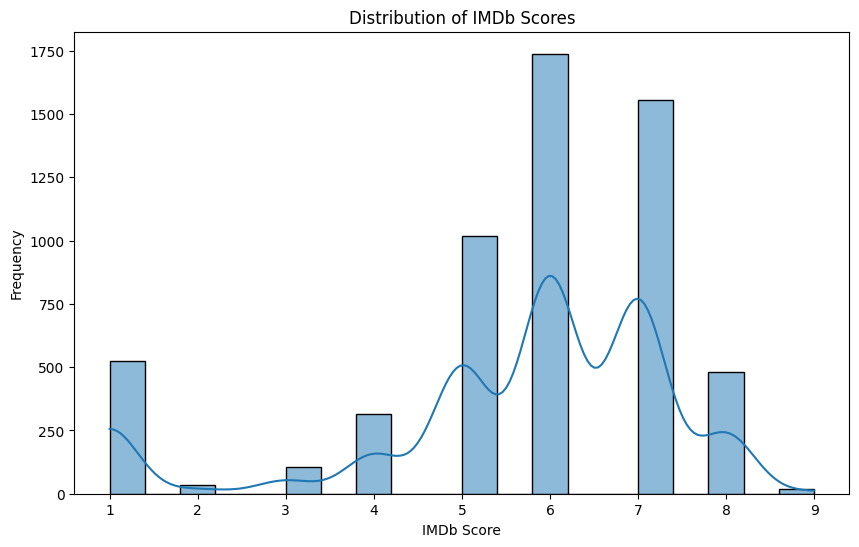

In [193]:
# Data Visualization
plt.figure(figsize=(10, 6))
sns.histplot(data['imdb_score'], bins=20, kde=True)
plt.title('Distribution of IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.show()

In [194]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to each numerical column
numerical_columns = ['runtime', 'imdb_score', 'imdb_votes']
for column in numerical_columns:
    data = remove_outliers(data, column)

data

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes
10,The Professionals,MOVIE,1966,PG-13,117,"western, action, european",US,1,7,16168
13,Richard Pryor: Live in Concert,MOVIE,1979,R,78,"comedy, documentation",US,1,8,5141
14,The Long Riders,MOVIE,1980,R,99,"western, crime",US,1,6,11329
16,Cairo Station,MOVIE,1958,Uk,77,"drama, crime, comedy",EG,1,7,4385
17,The Queen,MOVIE,1968,Uk,68,documentation,US,1,7,1117
...,...,...,...,...,...,...,...,...,...,...
5800,Momshies! Your Soul is Mine,MOVIE,2021,Uk,108,comedy,PH,1,5,26
5801,Fine Wine,MOVIE,2021,Uk,100,"romance, drama",NG,1,6,39
5803,Clash,MOVIE,2021,Uk,88,"family, drama","NG, CA",1,6,32
5804,Shadow Parties,MOVIE,2021,Uk,116,"action, thriller",,1,6,9


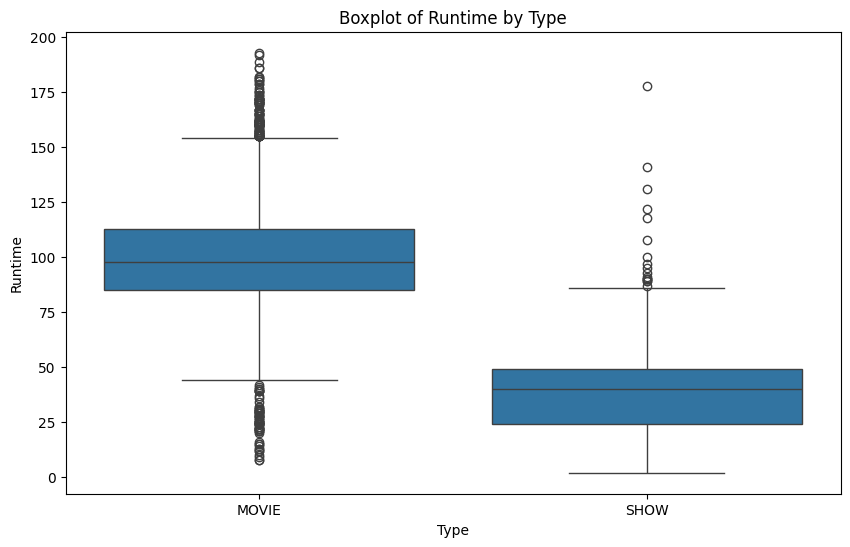

In [195]:
# Distribution Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='runtime', data=data)
plt.title('Boxplot of Runtime by Type')
plt.xlabel('Type')
plt.ylabel('Runtime')
plt.show()

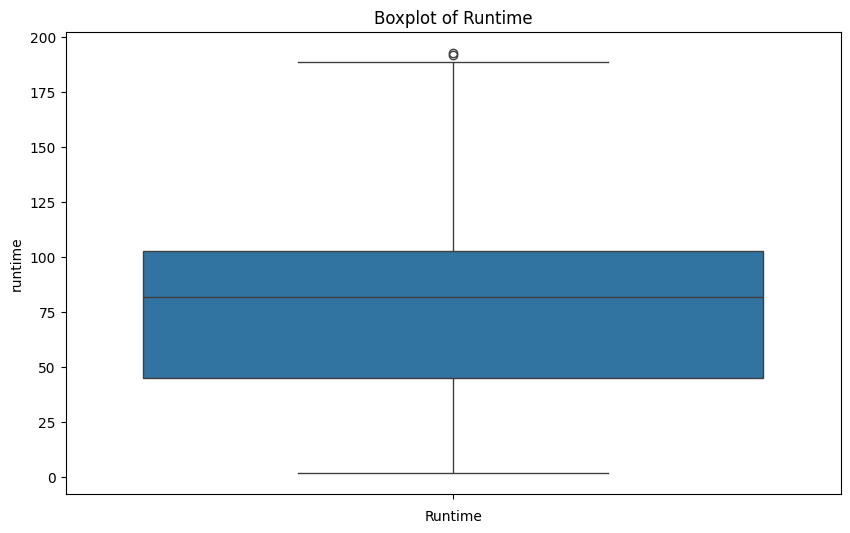

In [196]:
# Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(data['runtime'])
plt.title('Boxplot of Runtime')
plt.xlabel('Runtime')
plt.show()

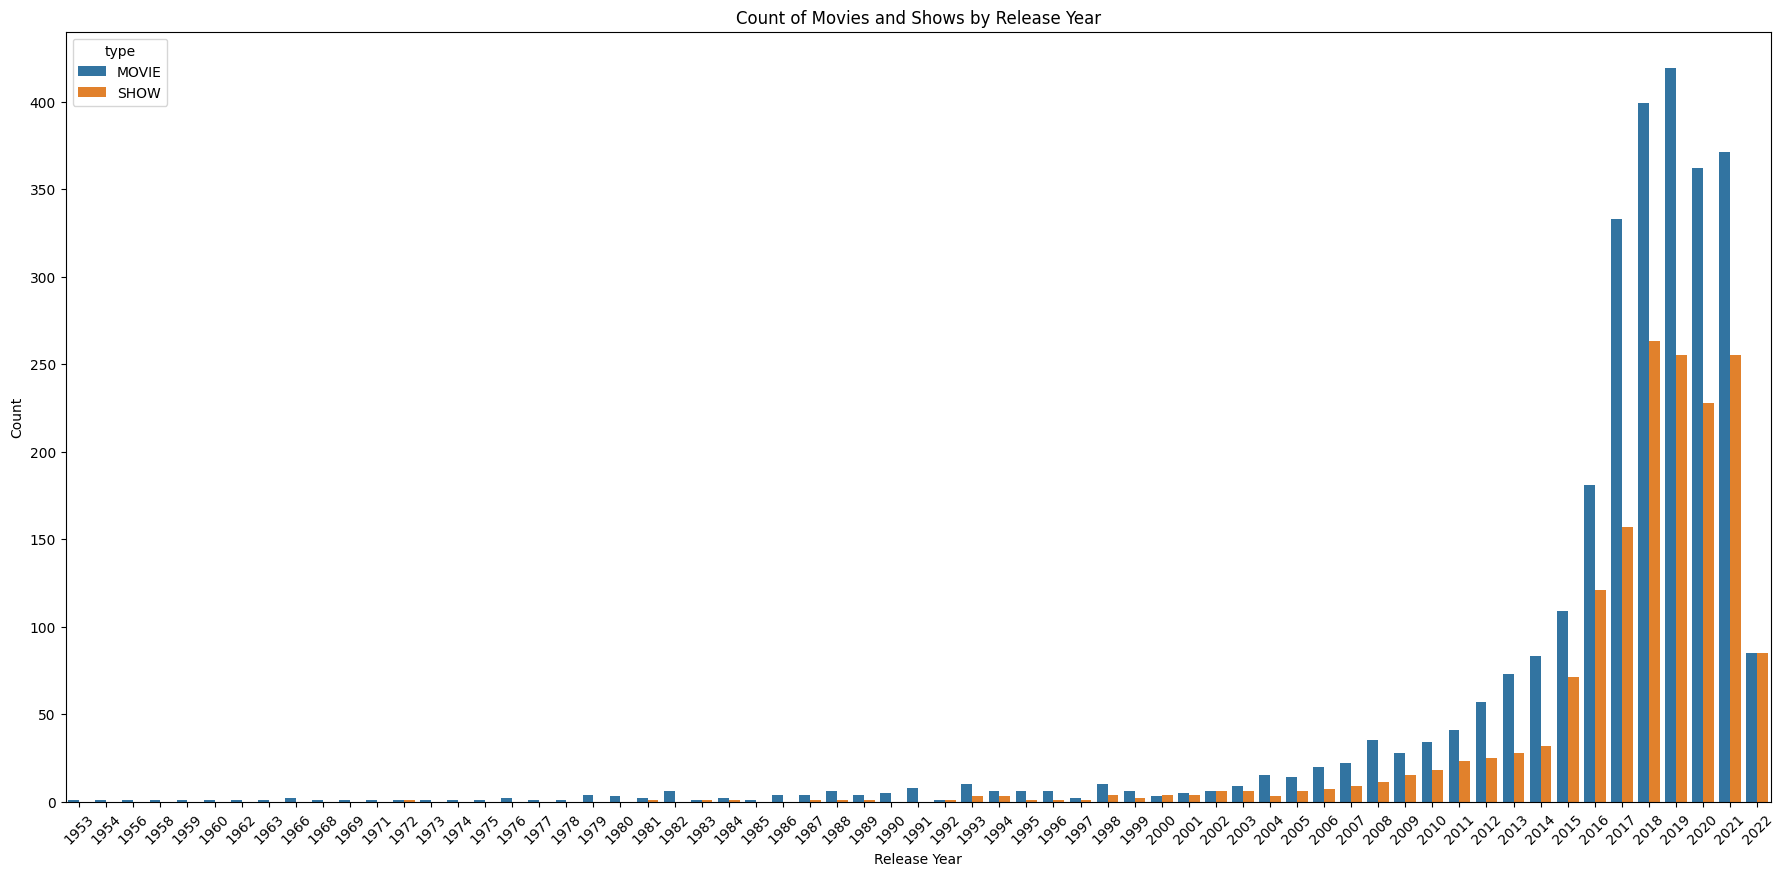

In [197]:
# Count of movies and shows by release year
plt.figure(figsize=(22, 10))
sns.countplot(data=data, x='release_year', hue='type')
plt.title('Count of Movies and Shows by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

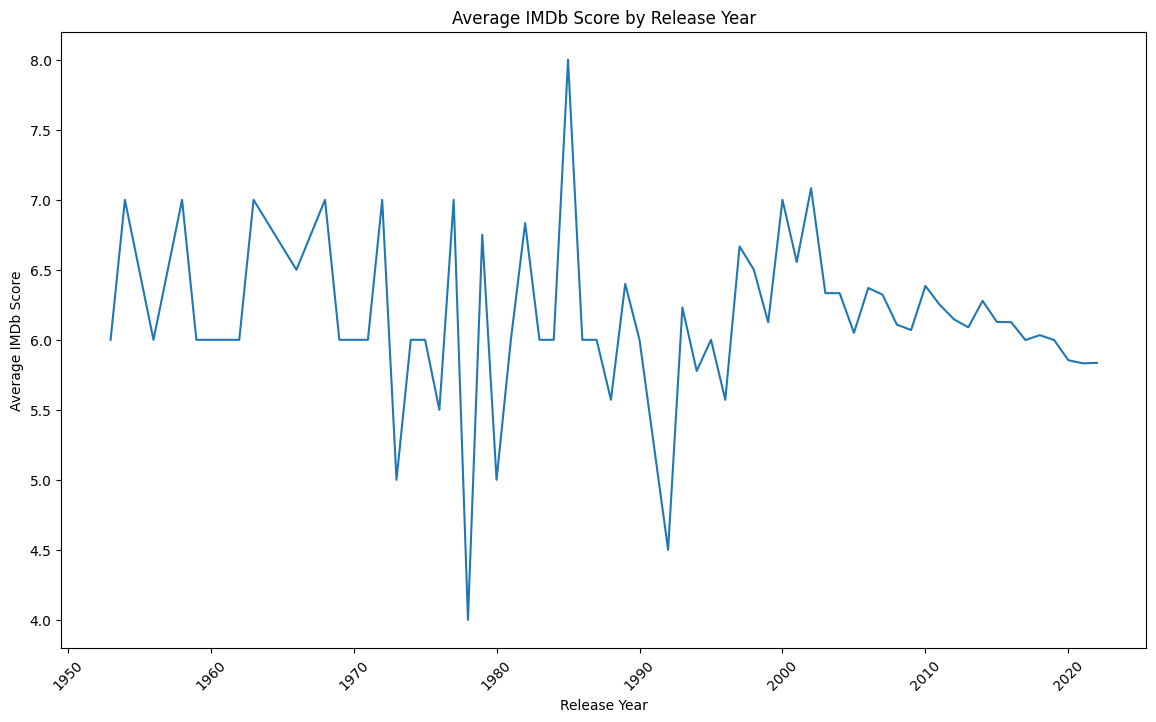

In [203]:
# Average IMDb score by release year
avg_imdb_score = data.groupby('release_year')['imdb_score'].mean().reset_index()
plt.figure(figsize=(14, 8))
sns.lineplot(data=avg_imdb_score, x='release_year', y='imdb_score')
plt.title('Average IMDb Score by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Score')
plt.xticks(rotation=45)
plt.show()

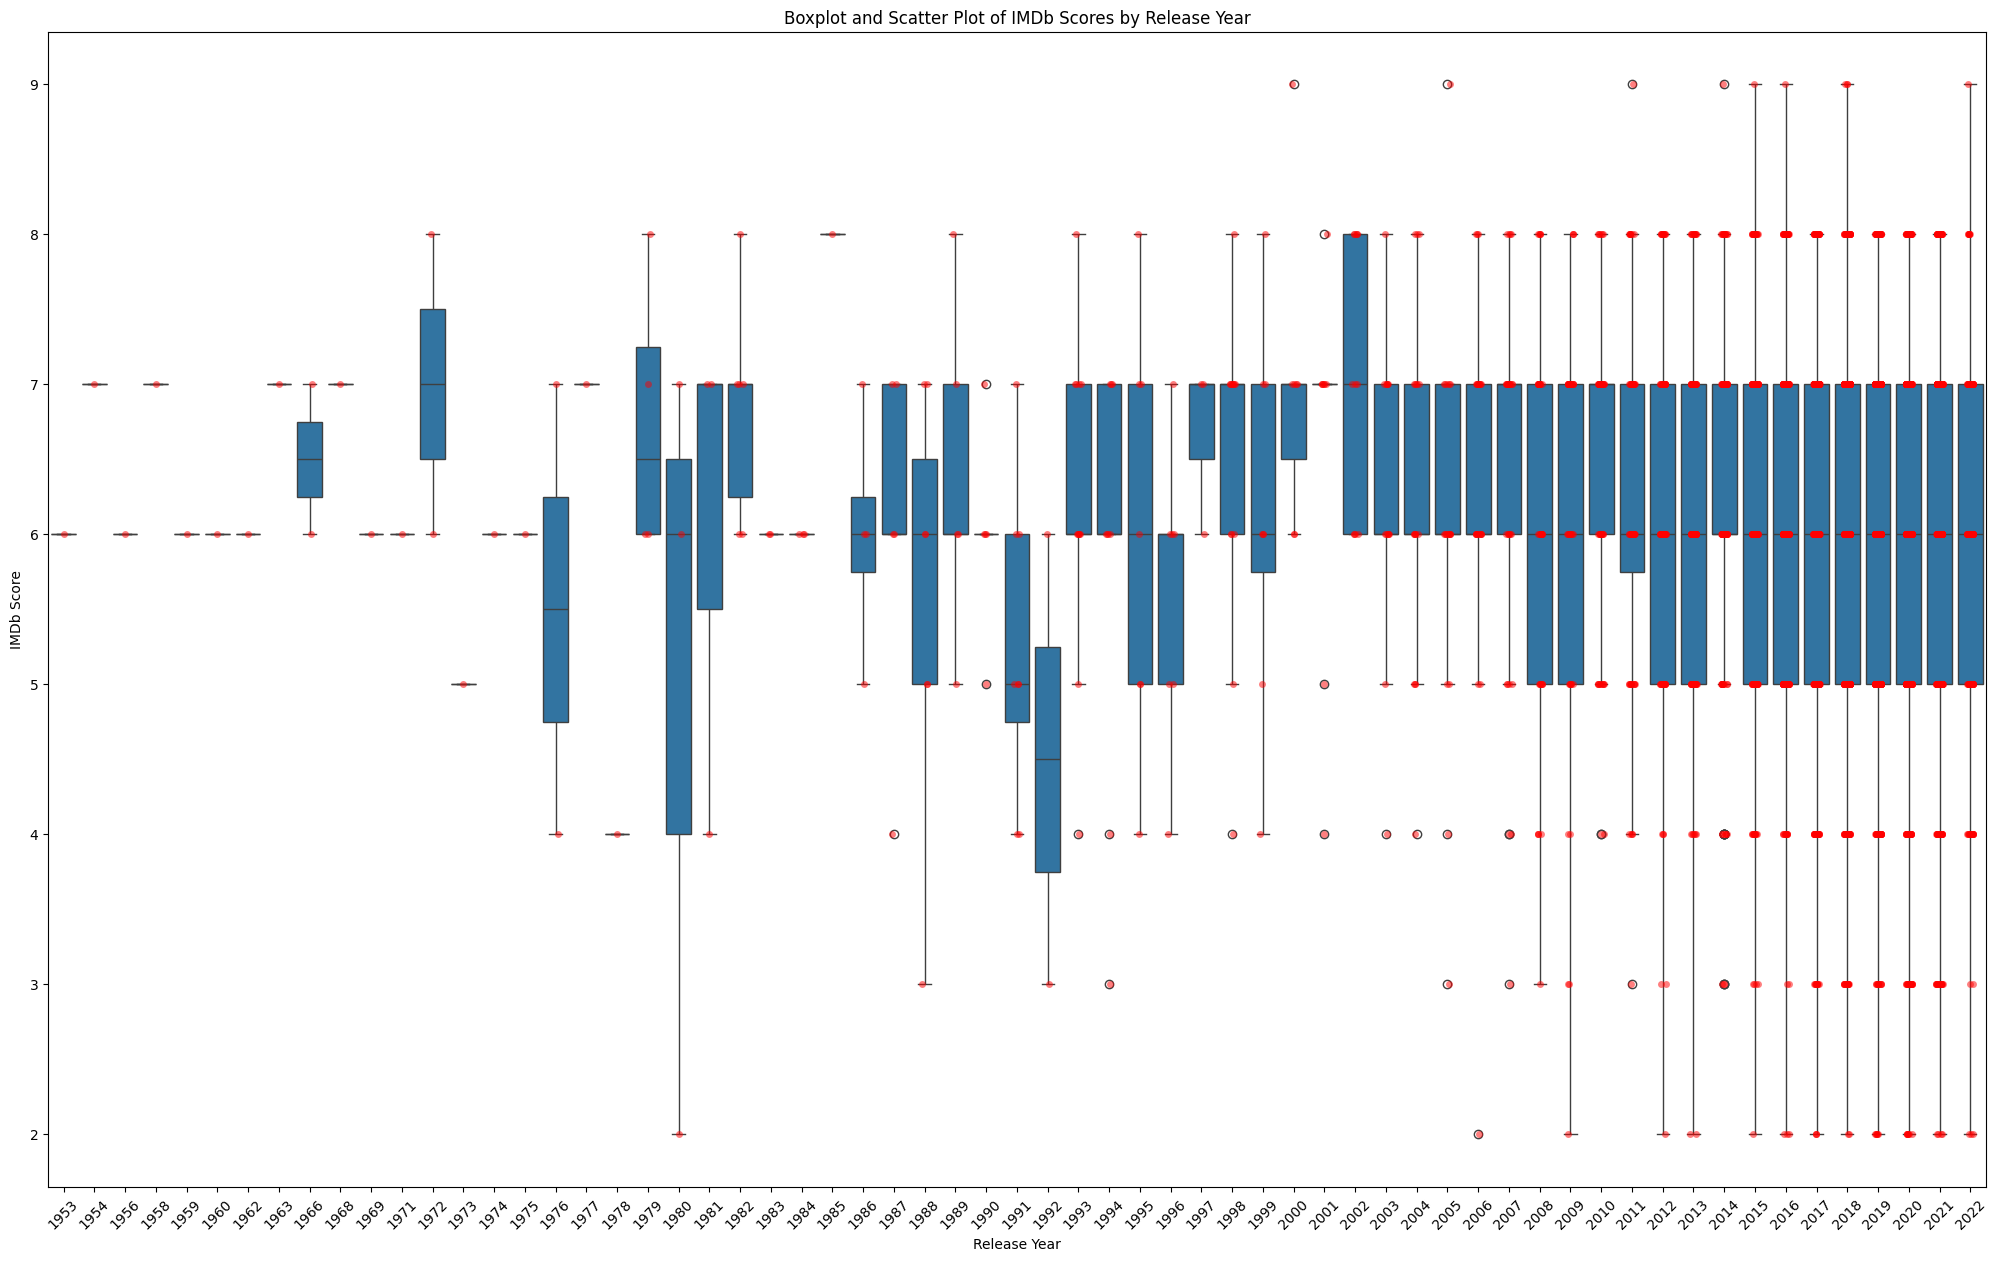

In [207]:
plt.figure(figsize=(25, 15))
sns.boxplot(x='release_year', y='imdb_score', data=data)
sns.stripplot(x='release_year', y='imdb_score', data=data, color='red', alpha=0.5)
plt.title('Boxplot and Scatter Plot of IMDb Scores by Release Year')
plt.xlabel('Release Year')
plt.ylabel('IMDb Score')
plt.xticks(rotation=45)
plt.show()

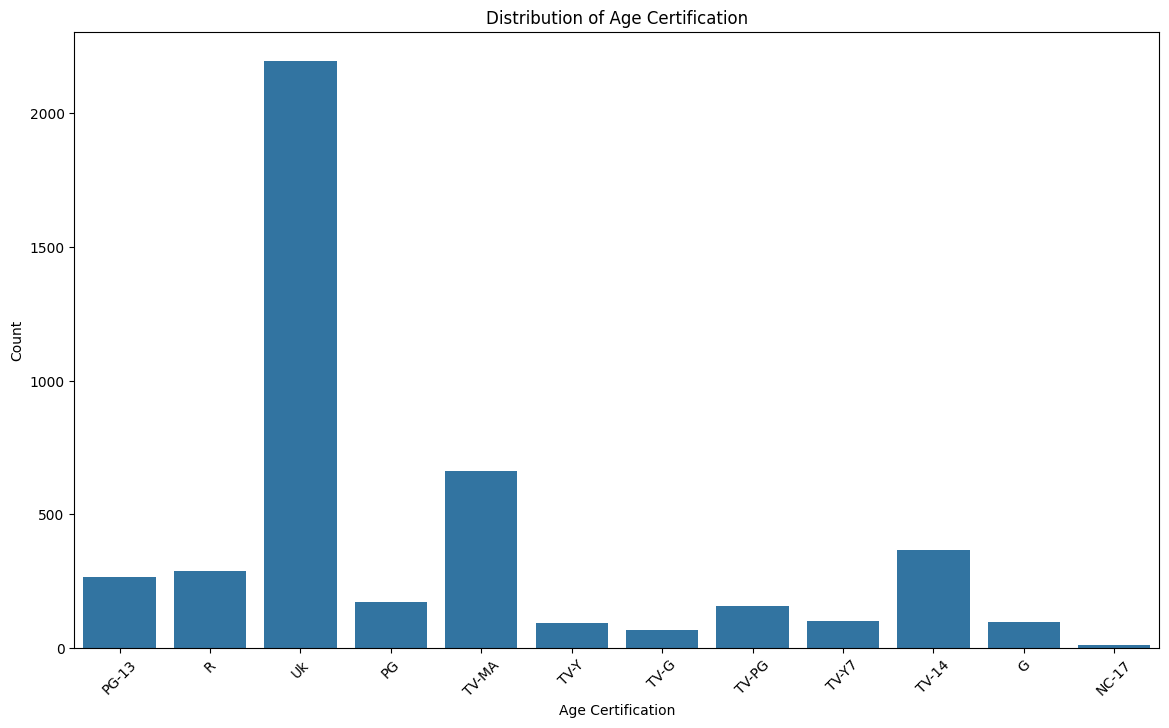

In [199]:
# Distribution of Categorical Variables
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x='age_certification')
plt.title('Distribution of Age Certification')
plt.xlabel('Age Certification')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

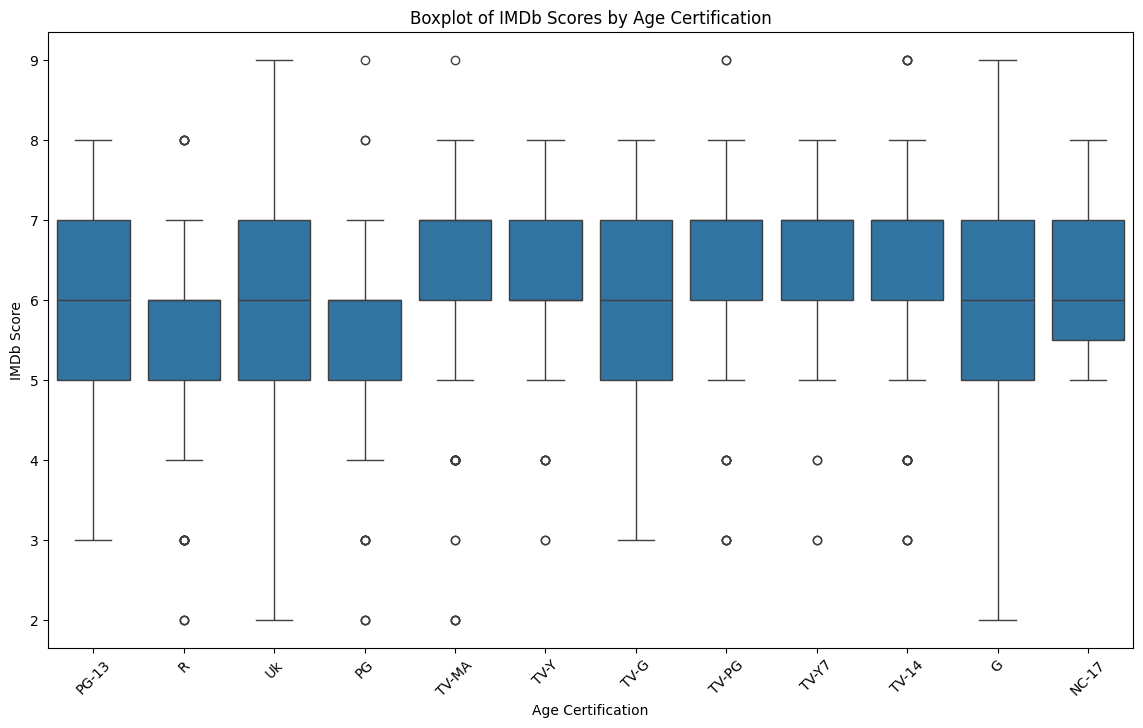

In [200]:
# Boxplot of IMDb Scores by Age Certification
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='age_certification', y='imdb_score')
plt.title('Boxplot of IMDb Scores by Age Certification')
plt.xlabel('Age Certification')
plt.ylabel('IMDb Score')
plt.xticks(rotation=45)
plt.show()

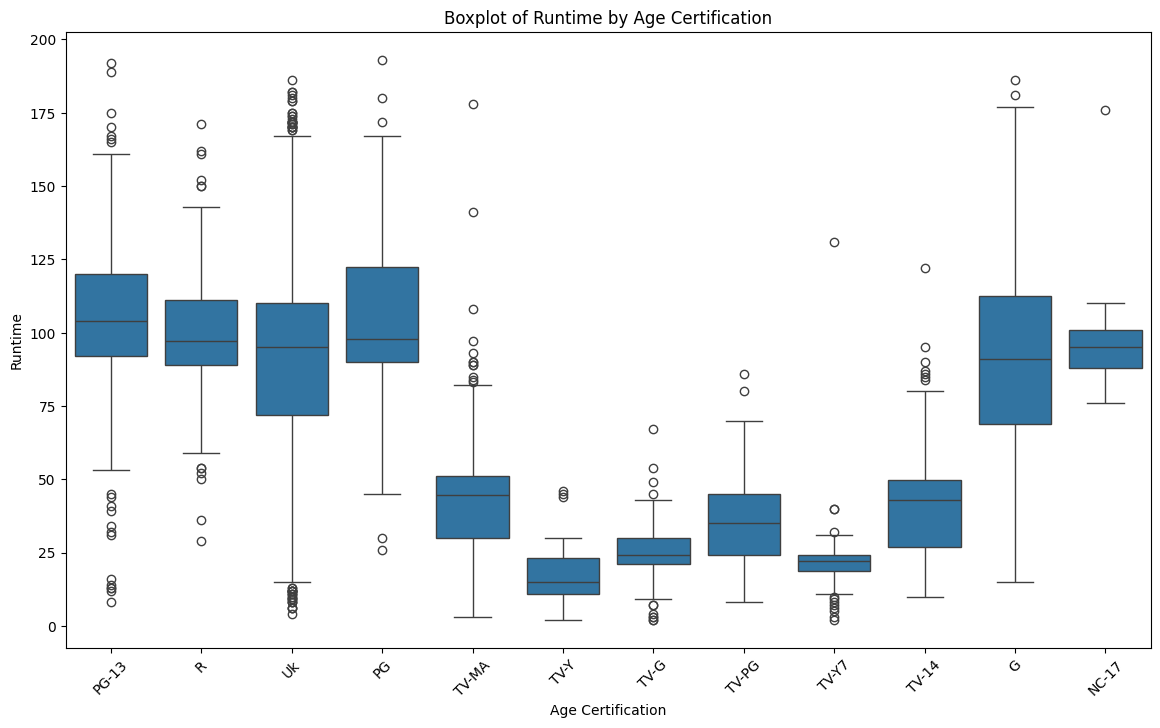

In [201]:
# Boxplot of Runtime by Age Certification
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='age_certification', y='runtime')
plt.title('Boxplot of Runtime by Age Certification')
plt.xlabel('Age Certification')
plt.ylabel('Runtime')
plt.xticks(rotation=45)
plt.show()

In [202]:
data.to_csv(r'C:\Users\salma\OneDrive\Desktop\SALMAN\ds-projects\netflix_analysis\cleaned_netflix_data.csv', index=False)